# SCIMAP Tutorial (for Exampler-001)

Created on Fri Dec 16 17:00:00 2022</br>
@author: Ajit Johnson Nirmal</br>
@version: 1.0.0 Heng's editted

(1) Create an AnnData object with your data

In [1]:
# Import Libraries 
import sys
import os
import warnings
warnings.simplefilter('ignore', FutureWarning)
warnings.simplefilter('ignore', UserWarning)
import anndata as ad
import pandas as pd
import scimap as sm
import scanpy as sc
from icecream import ic
import seaborn as sns
sns.set(color_codes=True)

2023-06-02 01:55:15.356451: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-02 01:55:15.805914: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-02 01:55:16.989185: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-02 01:55:16.996033: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-02 01:55:20.339869: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [3]:
# Set Working Directory
os.chdir("/mnt/sisplockers/kriengkraip/mcmicro/exemplar-001/")

In [4]:
# Load MCMICRO output file
table_path = [os.path.join(os.getcwd(),'quantification/exemplar-001--unmicst_cell.csv')] # Loading mcmicro_output.csv
adata = sm.pp.mcmicro_to_scimap(table_path, # path to the CSV file as a list
                                drop_markers=None, # Drop unwanted markers like background write as a list e.g. ["PERK", "NOS2","BG1","BG2","BG3","ACTIN"]
                               )

Loading exemplar-001--unmicst_cell.csv


(2) Display 'adata' variable

In [5]:
adata # adata contents

AnnData object with n_obs × n_vars = 11170 × 9
    obs: 'X_centroid', 'Y_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Solidity', 'Extent', 'Orientation', 'CellID', 'imageid'
    uns: 'all_markers'

In [6]:
adata.X # log normalized data

array([[7.0713964, 5.0862536, 6.5581856, ..., 6.55858  , 5.312092 ,
        6.7501044],
       [7.0266776, 5.181417 , 6.6768646, ..., 6.9361844, 5.962293 ,
        6.806264 ],
       [7.131325 , 5.0622888, 6.7059155, ..., 7.1916356, 5.670159 ,
        6.847166 ],
       ...,
       [7.068826 , 5.3337684, 6.882378 , ..., 6.816498 , 5.6072927,
        6.8640304],
       [7.056731 , 5.417724 , 6.979956 , ..., 6.841707 , 5.629669 ,
        6.7806916],
       [7.0704327, 5.447573 , 6.2774568, ..., 6.3313427, 5.132016 ,
        6.7404137]], dtype=float32)

In [7]:
adata.raw.X # raw data

array([[1176.7913 ,  160.78261,  703.99133, ...,  704.2696 ,  201.77391,
         853.1478 ],
       [1125.2826 ,  176.93478,  792.8261 , ..., 1027.8369 ,  387.5    ,
         902.48914],
       [1249.5322 ,  156.95161,  816.2258 , ..., 1327.2742 ,  289.08066,
         940.20966],
       ...,
       [1173.7681 ,  206.21739,  973.942  , ...,  911.7826 ,  271.4058 ,
         956.2174 ],
       [1159.6451 ,  224.36559, 1073.871  , ...,  935.086  ,  277.5699 ,
         879.6774 ],
       [1175.6567 ,  231.19403,  531.43286, ...,  560.91046,  168.35822,
         844.91046]], dtype=float32)

In [8]:
adata.obs # meta data

,X_centroid,Y_centroid,Area,MajorAxisLength,MinorAxisLength,Eccentricity,Solidity,Extent,Orientation,CellID,imageid
exemplar-001--unmicst_cell_1,1768.330435,257.226087,115,12.375868,11.823117,0.295521,0.966387,0.798611,-1.104797,1,exemplar-001--unmicst_cell
exemplar-001--unmicst_cell_2,1107.173913,665.869565,92,11.874070,9.982065,0.541562,0.948454,0.696970,-0.435290,2,exemplar-001--unmicst_cell
exemplar-001--unmicst_cell_3,1116.290323,671.338710,62,9.995049,8.673949,0.496871,0.837838,0.563636,1.355995,3,exemplar-001--unmicst_cell
exemplar-001--unmicst_cell_4,982.845588,676.996324,272,25.566077,15.136434,0.805900,0.834356,0.537549,-0.709765,4,exemplar-001--unmicst_cell
exemplar-001--unmicst_cell_5,1141.135135,680.140049,407,26.723557,19.630426,0.678529,0.933486,0.707826,-0.719601,5,exemplar-001--unmicst_cell
...,...,...,...,...,...,...,...,...,...,...,...
exemplar-001--unmicst_cell_11166,1260.186441,3132.457627,177,20.959097,11.374283,0.839933,0.917098,0.702381,-1.390099,11166,exemplar-001--unmicst_cell
exemplar-001--unmicst_cell_11167,1156.121212,3131.393939,66,10.461985,8.316377,0.606722,0.891892,0.660000,-0.387542,11167,exemplar-001--unmicst_cell
exemplar-001--unmicst_cell_11168,1175.463768,3132.014493,69,11.165588,7.978289,0.699592,0.920000,0.766667,0.774327,11168,exemplar-001--unmicst_cell
exemplar-001--unmicst_cell_11169,1274.462366,3132.591398,93,11.701692,10.342006,0.467857,0.939394,0.845455,-1.296469,11169,exemplar-001--unmicst_cell


In [9]:
adata.uns['all_markers'] # marker data

['DNA_6',
 'ELANE',
 'CD57',
 'CD45',
 'DNA_7',
 'CD11B',
 'SMA',
 'CD16',
 'DNA_8',
 'ECAD',
 'FOXP3',
 'NCAM']

(3) Explore more on expression proteins

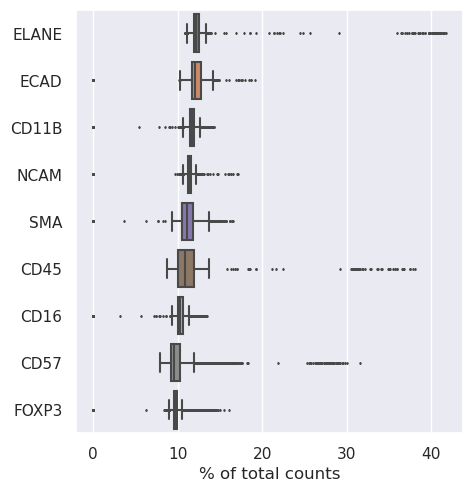

In [10]:
# Boxplot
sc.pl.highest_expr_genes(adata, n_top=20, ) # Most expressing proteins

... storing 'imageid' as categorical


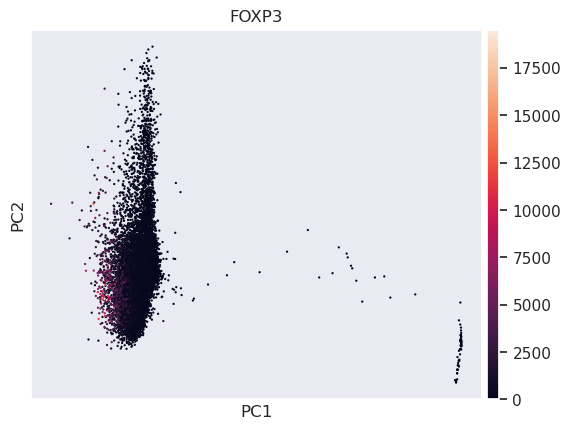

In [11]:
# Scatterplot
sc.tl.pca(adata, svd_solver='arpack') # peform PCA
sc.pl.pca(adata, color='FOXP3') # scatter plot in the PCA coordinates

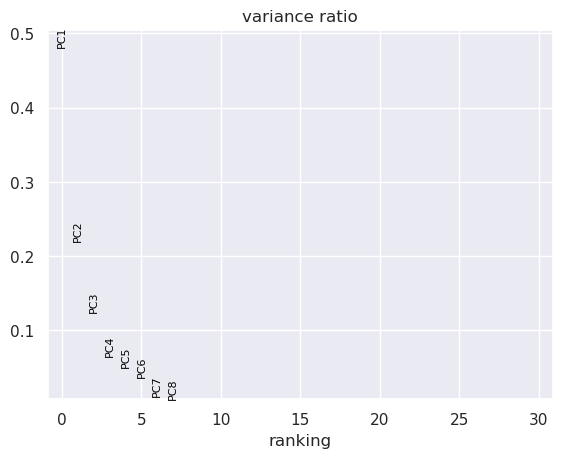

In [12]:
# Plot variance ranking
sc.pl.pca_variance_ratio(adata) # PCs to the total variance in the data

(4) Run Cell-Phenotyping

In [12]:
# %gui qt

In [13]:
# Identify the manual gates (This step must be run all of your markers)
# image_path = os.path.join(os.getcwd(),'registration/exemplar-001.ome.tif')
# %gui qt
# marker_of_interest = 'CD45'
# sm.pl.gate_finder (image_path,
#                    adata,
#                    marker_of_interest='CD45',
#                    from_gate = 5,
#                    to_gate = 9,
#                    increment = 0.1,
#                    markers=['ELANE','DNA_6', 'CD57', 'FOXP3'],
#                    channel_names = 'default',
#                    x_coordinate='X_centroid',
#                    y_coordinate='Y_centroid',
#                    point_size=10,
#                    subset= '77',
#                    seg_mask=None)

In [13]:
# Rescale the data based on the identified gates
# manual_gate = pd.read_csv('manual_gates.csv') # Load the manual gates***
# adata = sm.pp.rescale (adata, gate=manual_gate)
adata = sm.pp.rescale(adata)

GMM for ['exemplar-001--unmicst_cell']
Categories (1, object): ['exemplar-001--unmicst_cell']
Finding the optimal gate by GMM for ELANE
Finding the optimal gate by GMM for CD57
Finding the optimal gate by GMM for CD45
Finding the optimal gate by GMM for CD11B
Finding the optimal gate by GMM for SMA
Finding the optimal gate by GMM for CD16
Finding the optimal gate by GMM for ECAD
Finding the optimal gate by GMM for FOXP3
Finding the optimal gate by GMM for NCAM
Scaling Image exemplar-001--unmicst_cell
Scaling ELANE
Scaling CD57
Scaling CD45
Scaling CD11B
Scaling SMA
Scaling CD16
Scaling ECAD
Scaling FOXP3
Scaling NCAM


In [14]:
adata.uns['gates'] # gates data

imageid,exemplar-001--unmicst_cell
markers,
CD11B,3.559838
CD16,6.272904
CD45,6.512384
CD57,6.516099
ECAD,3.685633
ELANE,7.392729
FOXP3,6.174185
NCAM,6.352898
SMA,5.538066


In [15]:
# phenotyping based on workflow CSV file
phenotype = pd.read_csv('/mnt/sisplockers/tutorials/scimap/files/phenotype_workflow_for_exemplar_001.csv') # Loading phenotype_workflow.csv
adata = sm.tl.phenotype_cells(adata, phenotype)

Phenotyping Other Immune cells
-- Subsetting Other Immune cells
Phenotyping Myeloid Lineage
Consolidating the phenotypes across all groups


In [16]:
# Run Clustering
adata = sm.tl.cluster (adata, k = 10, method = 'kmeans', sub_cluster_column='phenotype', use_raw = True)
adata = sm.tl.cluster (adata, k = 15, method = 'leiden', sub_cluster_column='phenotype', use_raw = True)
adata = sm.tl.cluster (adata, k = 15, method = 'phenograph', sub_cluster_column='phenotype', use_raw = True)

Kmeans clustering
Leiden clustering
Phenograph clustering
Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.4665210247039795 seconds
Jaccard graph constructed in 8.290484189987183 seconds
Wrote graph to binary file in 0.5024654865264893 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.83229
Louvain completed 21 runs in 2.7568414211273193 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 14.154478788375854 seconds


In [18]:
# Overlaying the phenotypes to images (Cannot be run on the Web Browser)
# image_path = os.path.join(os.getcwd(),'registration/exemplar-001.ome.tif')
# sm.pl.image_viewer(image_path, adata)
# sm.pl.image_viewer(image_path, adata, overlay = 'leiden', point_color='white', point_size=6)

In [17]:
# Summary of the phenotyping
adata.obs['phenotype'].value_counts()

Unknown               5598
Myeloid Lineage       5554
Other Immune cells      18
Name: phenotype, dtype: int64

... storing 'phenotype' as categorical
... storing 'kmeans' as categorical
... storing 'leiden' as categorical
... storing 'phenograph' as categorical


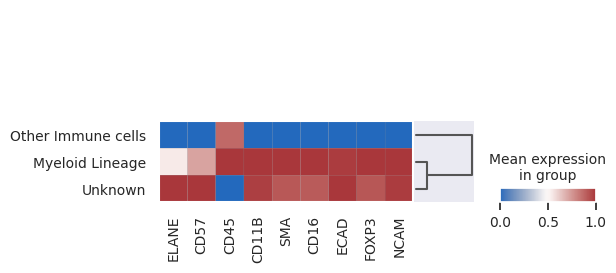

In [18]:
# Heatmap and UMAP of the probability based phenotyping
# sc.tl.dendrogram(adata, groupby='phenotype')
sc.pl.matrixplot(adata, var_names= adata.var.index, groupby='phenotype', dendrogram=True, use_raw=False, cmap="vlag", standard_scale='var')

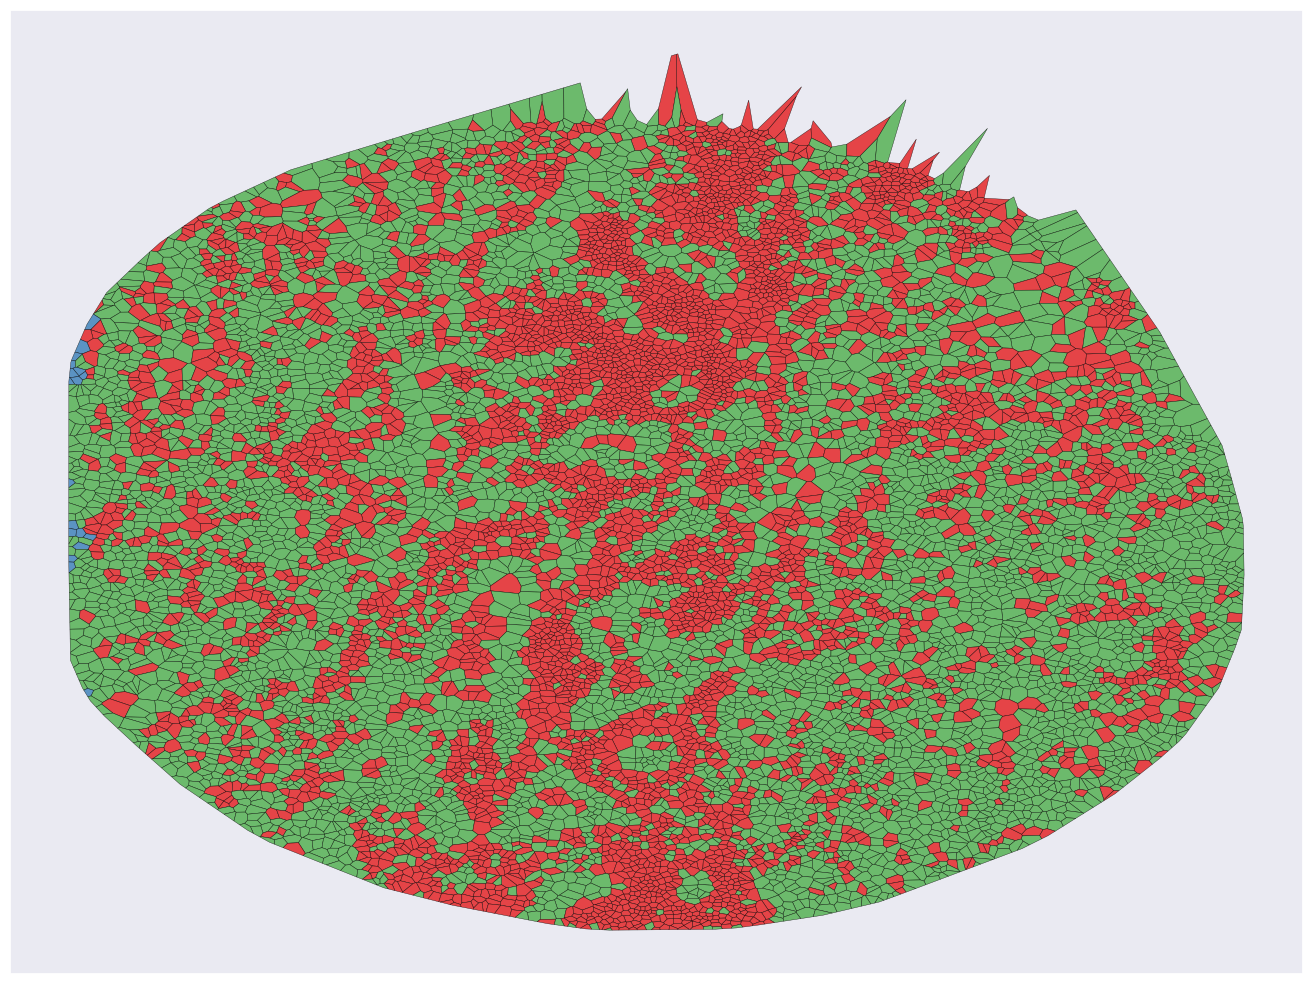

In [19]:
# Voronoi Plots (This can take several minutes)
# import matplotlib.pyplot as plt
# plt.rcParams['figure.figsize'] = [15, 10]
# sm.pl.voronoi(adata, color_by='phenotype', 
#                  voronoi_edge_color = 'black',
#                  voronoi_line_width = 0.3, 
#                  voronoi_alpha = 0.8, 
#                  size_max=5000,
#                  overlay_points=None, 
#                  plot_legend=True, 
#                  legend_size=6)

In [20]:
# Heatmap and UMAP of the probability based phenotyping
adata = sm.tl.umap(adata)

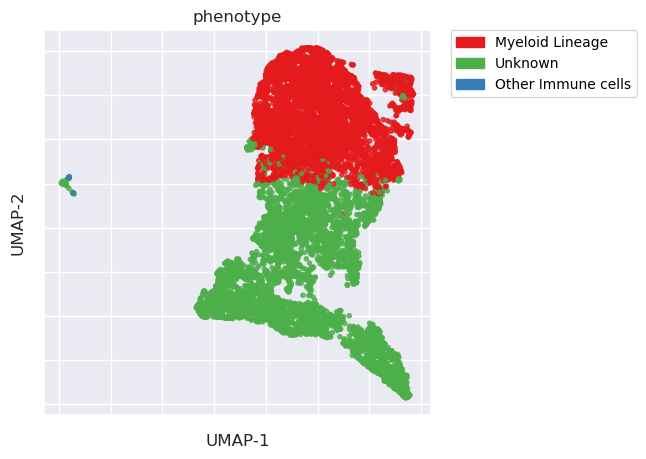

In [21]:
# View the clustering - phenotype
sns.set(rc={'figure.figsize':(11.7,8.27)})
sm.pl.umap(adata, color=['phenotype'])

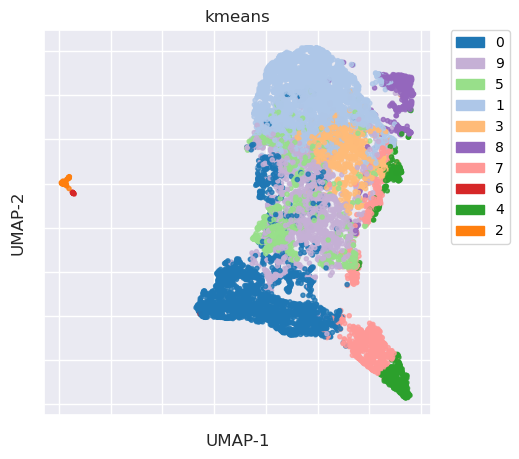

In [22]:
# View the clustering - kmeans
sns.set(rc={'figure.figsize':(11.7,8.27)})
sm.pl.umap(adata, color=['kmeans'])

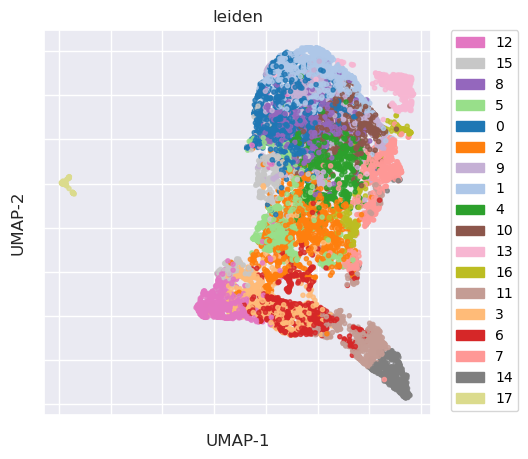

In [23]:
# View the clustering - leiden
sns.set(rc={'figure.figsize':(11.7,8.27)})
sm.pl.umap(adata, color=['leiden'])

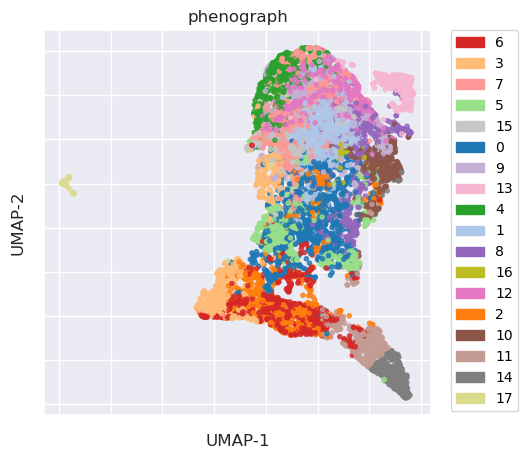

In [24]:
# View the clustering - phenograph
sns.set(rc={'figure.figsize':(11.7,8.27)})
sm.pl.umap(adata, color=['phenograph'])

In [25]:
# Save the results
# adata.write('scimap_exampler_001_data.h5ad')

data = sm.hl.scimap_to_csv (adata, data_type='raw')
data.to_csv('scimap_exampler_001_data.h5ad.csv', index=False)